In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt

In [2]:
label_path = './input/labels.csv'
image_path = './input/head_ct/head_ct'

label_df = pd.read_csv(label_path)
image_files = sorted(glob.glob(image_path + '/*.png'))

In [3]:
label_path = './input/labels.csv'
label_df = pd.read_csv(label_path)
label_df

,id,hemorrhage
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
195,195,0
196,196,0
197,197,0
198,198,0


In [4]:
labels = np.array(label_df[' hemorrhage'].tolist())

In [35]:
images = np.array([cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in image_files])

/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


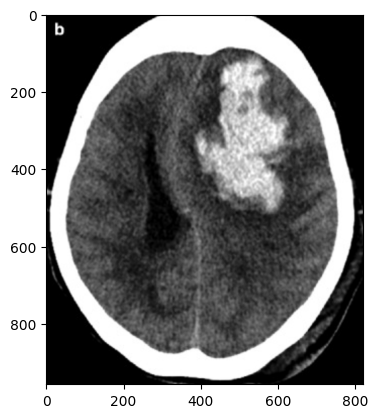

In [36]:
plt.imshow(images[0], cmap='gray')

In [37]:
fft_image = np.fft.fft2(images[0])
fft_image = np.fft.fftshift(fft_image)

In [39]:
magnitude_spectrum = 20 * np.log(np.abs(fft_image))
magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

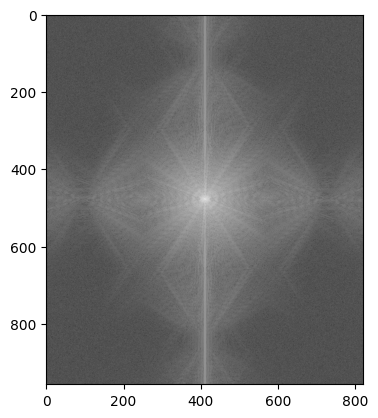

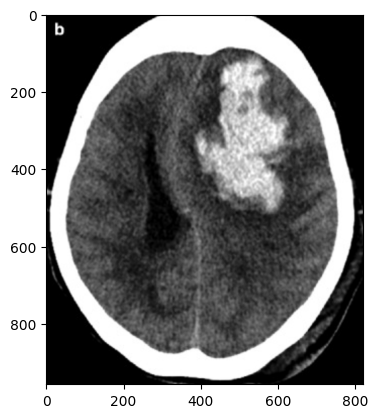

In [41]:
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()
plt.imshow(images[0], cmap='gray')

In [224]:
def fft(img):
    fft_image = np.fft.fft2(img)
    fft_image = np.fft.fftshift(fft_image)
    magnitude_spectrum = 20 * np.log(np.abs(fft_image))
    magnitude_spectrum = cv2.normalize(magnitude_spectrum, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    rows, cols = img.shape
    HP = highPass(rows, cols)
    highPassCenter = fft_image * HP

    ihighPassCenter = np.fft.ifftshift(highPassCenter)
    iHighPassOriginal = np.fft.ifft2(ihighPassCenter)
    imgHighPass = np.abs(iHighPassOriginal)


    e3 = 20 * np.log(np.abs(highPassCenter)+0.001)

    plt.figure(figsize=(20, 4))
    plt.subplot(151), plt.imshow(img, cmap='gray')
    plt.subplot(152), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.subplot(153), plt.imshow(HP, cmap='gray')
    plt.subplot(154), plt.imshow(e3, cmap='gray')
    plt.subplot(155), plt.imshow(imgHighPass, cmap='gray')

In [225]:
def highPass(rows, cols):
    mask = np.ones((rows, cols), np.uint8)
    # mask[int(rows/4):int(rows*3/4), int(cols/4):int(cols*3/4)] = 0
    cv2.circle(mask, (int(cols/2), int(rows/2)), int(min(rows, cols)/10), 0, -1)
    return mask

In [226]:
def lowPass(rows, cols):
    mask = np.zeros((rows, cols), np.uint8)
    # mask[int(rows/4):int(rows*3/4), int(cols/4):int(cols*3/4)] = 1
    cv2.circle(mask, (int(cols/2), int(rows/2)), int(min(rows, cols)/9), 1, -1)
    return mask

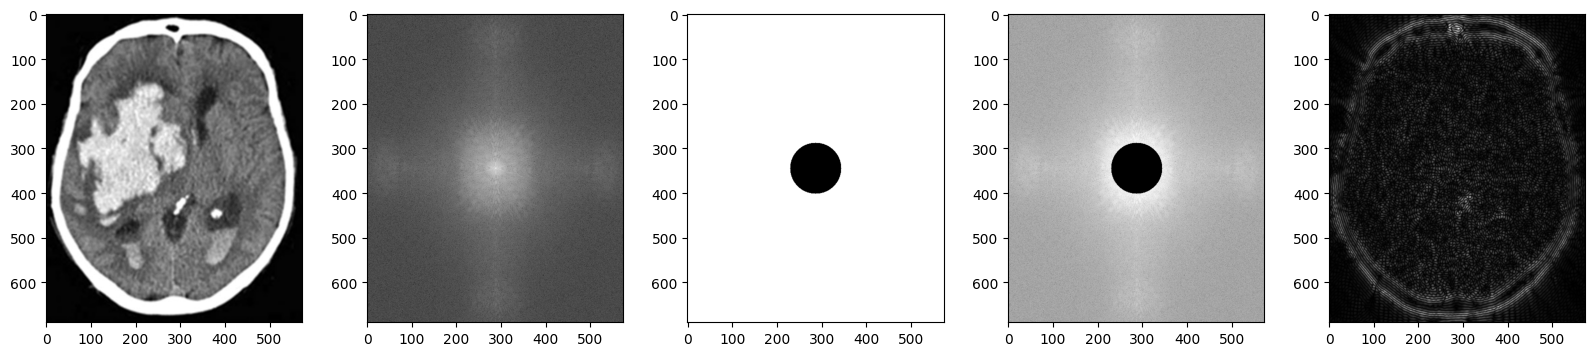

In [227]:
fft(images[5])

/home/ubuntu/miniconda3/envs/env/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  


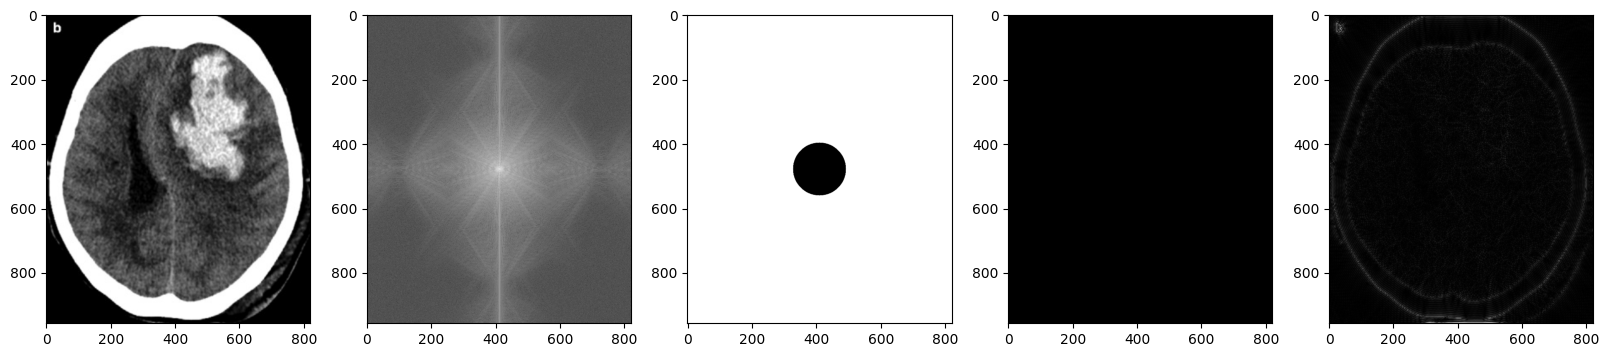

In [211]:
fft(images[0])

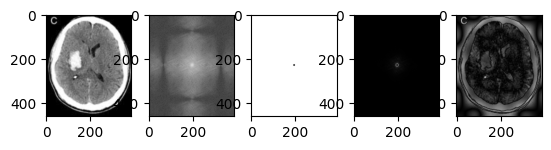

In [106]:
fft(images[47])

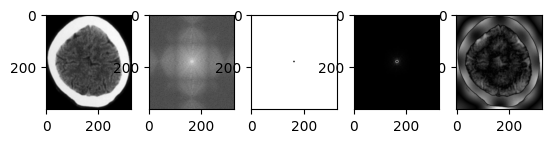

In [107]:
fft(images[175])

In [209]:
def auto_canny(image, sigma=0.6):
    # 计算单通道像素强度的中位数
    v = np.average(image)

    # 选择合适的lower和upper值，然后应用它们
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged


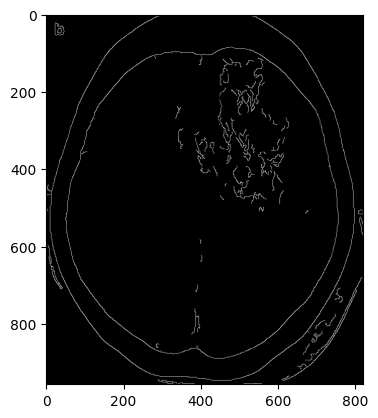

In [210]:
plt.imshow(auto_canny(images[0]), cmap='gray')